# Coverage characterization using GenomeCov class (sequana.bedtools module)

<center>http://sequana.readthedocs.org</center>

Author: Thomas Cokelaer 2016-2018

Illustrative example of the Coverage module with interactive widget to see effect of the running median window length

First, let us import the functions of interest (sequana_data is optional and used to import some data from sequana)

In [19]:
%pylab inline
from sequana import GenomeCov, sequana_data
rcParams['figure.figsize'] = (10,6)

Populating the interactive namespace from numpy and matplotlib


/home/cokelaer/miniconda3/envs/py3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Read a Coverage file in BED format

In [20]:
gc = GenomeCov(sequana_data("virus.bed", "data"), low_threshold=-2.5, high_threshold=2.5)

Select one chromosome (there is only one in this case)

In [21]:
chrom = gc[0]

Compute the running median and plot the results

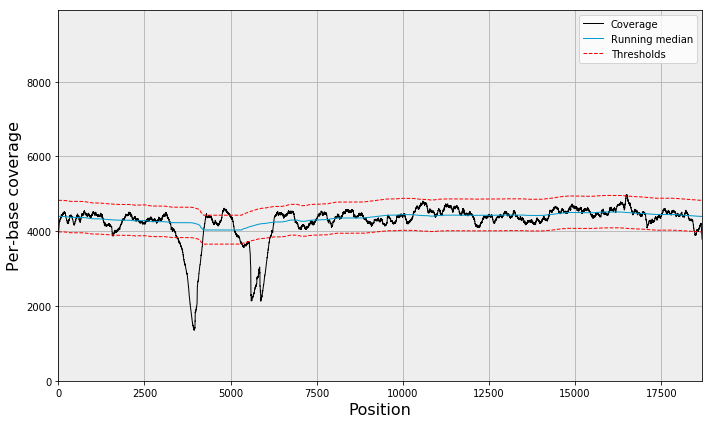

In [22]:
N = 4001
chrom.running_median(N, circular=True)
chrom.compute_zscore()
chrom.plot_coverage()

## Interactive view of the effects of the running window

In [23]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [24]:
def f(N):
    chrom.running_median(N, circular=True)
    chrom.compute_zscore()
    chrom.plot_coverage()
    ylim([1000,5500])
    plt.show()
    # plt.show is to fix issue reported in :
    # https://stackoverflow.com/questions/44329068/jupyter-notebook-interactive-plot-with-widgets

In [26]:
interact(f, N=widgets.IntSlider(min=501,max=8001, step=200))

interactive(children=(IntSlider(value=501, description='N', max=8001, min=501, step=200), Output()), _dom_classes=('widget-interact',))

<function __main__.f>

## Region of interests

In [27]:
chrom.running_median(4101)

In [28]:
chrom.compute_zscore()

In [31]:
chrom.get_rois().get_low_rois()

,chr,start,end,size,mean_cov,max_cov,mean_rm,mean_zscore,max_zscore,log2_ratio
0,virus,3442,4186,744,2765.901882,3849,4202.861559,-8.894642,-17.556643,-0.603622
2,virus,5305,6159,854,3035.642857,3855,4155.257611,-7.025427,-12.760033,-0.452936


## Some statistics

In [32]:
print(chrom)


Genome length:      18686
Sequencing depth (DOC):                   4257.52 
Sequencing depth (median):                4383.50 
Breadth of coverage (BOC) (percent):       100.00 
Genome coverage standard deviation:        489.60
Genome coverage coefficient variation:       0.11


In [33]:
chrom.get_centralness()

0.91688965000535161

In [34]:
print(chrom.get_stats())

{'DOC': 4257.516429412394, 'MAD': 126.5, 'BOC': 100.0, 'STD': 489.5952237708317, 'Median': 4383.5, 'CV': 0.11499549840572282}


## GC correlation

In [35]:
filename = sequana_data("JB409847.bed")
reference = sequana_data("JB409847.fasta")

gc = GenomeCov(filename)
gc.compute_gc_content(reference)

In [36]:
chrom = gc[0]
chrom.get_gc_correlation()

-0.61946655536887563

Computing 2D histogram. Please wait


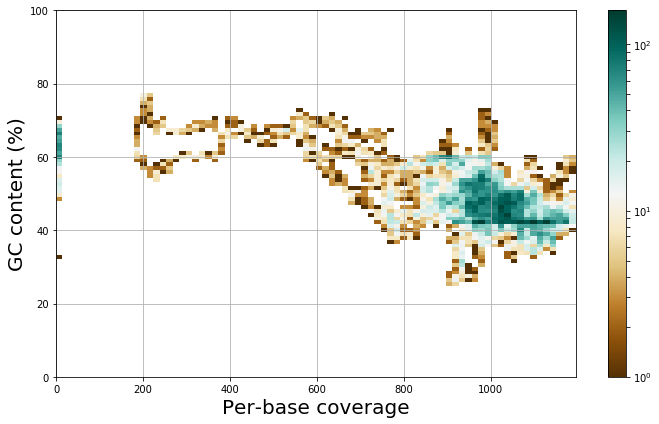

In [37]:
chrom.plot_gc_vs_coverage(cmap="BrBG", Nlevels=0, bins=[80,50])